# Table of Contents
* [Fiber convolution](#Fiber-convolution)
	* &nbsp;
		* [FWHM of COSINE](#FWHM-of-COSINE)
		* [1D Circle Kernel](#1D-Circle-Kernel)
		* [Compare kernels](#Compare-kernels)


# Fiber convolution

[Artigau 2018](#cite-artigau_optical_2018) mention an optical fiber convolves a spectrum like a sin function from 0 to pi.
A collapsed circle convolution.

Here we define a function to do that and compare it to a Guassian to check they have the same FWHM.

In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

### FWHM of COSINE

To be able to scale the circular kernel function to a given FWHM we need to know the FWHM of a trig function.
I am using a cosine function as it is centered on zero from $-\pi/2$ to $\pi/2$

lower = -1.0471975511965976 , upper = 1.0471975511965976
FWHM cos(x) =  -2.0943951023931953


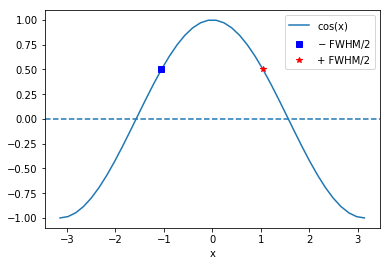

In [2]:
# Find FWHM of a cosine function

func = lambda x: np.cos(x) - 0.5
r1 = root(func, -0.01)
r2 = root(func, 0.01)

print("lower =", r1.x[0], ", upper =", r2.x[0])
cosine_fwhm =  r1.x[0] - r2.x[0]
print("FWHM cos(x) = ", cosine_fwhm )

x = np.linspace(-np.pi, np.pi, 40)
plt.plot(x, 0.5 + func(x), label="$\cos$(x)")
plt.plot(r1.x, 0.5, "bs", label="$-$ FWHM/2")
plt.plot(r2.x, 0.5, "r*", label="+ FWHM/2")
plt.axhline(0, ls="--")
plt.xlabel("x")
plt.legend()
# cosine_fwhm = 2.0943951


### 1D Circle Kernel

In [3]:
def oned_circle(x, center, fwhm):
    """Cosine from -pi/2 to pi/2.
    Scaleable by the FWHM.
    
    For optical fiber convolution.
    """
    FWHM_scale = 2.0943951  # Numerically derived
    A = 1
    B = FWHM_scale / fwhm
    
    result = A * np.cos(B * (x - center))
    
    # Limit to main lobe only
    upper_xi = center + np.pi/2/B
    lower_xi = center - np.pi/2/B
    mask = (x < upper_xi) & (x > lower_xi)

    result[~mask] = 0
    return result

In [4]:
def gaussian(x, center, fwhm):
    """Gaussian function of area = 1.

    Parameters
    ----------
    x: array-like
        Position array
    center: float
        Central position of Gaussian
    fwhm: float
        Full Width at Half Maximum

    Returns
    -------
    result: array-like
        Result of gaussian function sampled at x values.
    """
    if not isinstance(fwhm, (np.float, np.int)):
        raise TypeError("The fwhm value is not a number, {0}".format(type(fwhm)))
    if not isinstance(center, (np.float, np.int)):
        raise TypeError("The center value is not a number, {0}".format(type(center)))
    if not isinstance(x, np.ndarray):
        raise TypeError

    sigma = np.abs(fwhm) / (2 * np.sqrt(2 * np.log(2)))
    amp = 1.0 / (sigma * np.sqrt(2 * np.pi))
    tau = -((x - center) ** 2) / (2 * (sigma ** 2))
    result = amp * np.exp(tau)

    return result

### Compare kernels

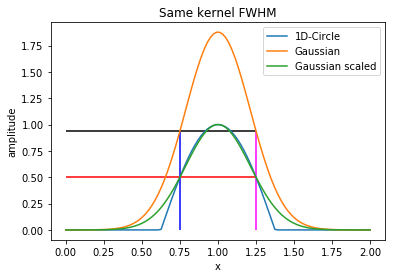

In [5]:
x = np.linspace(0, 2, 100)
fwhm = 0.5
center = 1
g = gaussian(x, center, fwhm)
g_scaled = g/max(g)
plt.plot(x, oned_circle(x, center, fwhm), label="1D-Circle")
plt.plot(x, g, label="Gaussian")
plt.plot(x, g_scaled, label="Gaussian scaled")
plt.xlabel("x")
plt.ylabel("amplitude")
plt.title("Same kernel FWHM")
x0 = center - (fwhm / 2)
x1 = center + (fwhm / 2)
g_max = max(g)
plt.hlines(y=0.5, xmin=0, xmax=x1, color="red")
plt.hlines(g_max/ 2, xmin=0, xmax=x1)
plt.vlines(x0, ymin=0, ymax=g_max/2, color="blue")
plt.vlines(x1, ymin=0, ymax=g_max/2, color="magenta")
plt.legend()
plt.show()

When scaled to a maximum of 1 at peak they have very similar shapes apart from their tails.

# Convolution by kernel (TODO:)



In [6]:
<!--bibtex
@article{artigau_optical_2018,
  archivePrefix = {arXiv},
  eprinttype = {arxiv},
  eprint = {1803.07646},
  title = {Optical and {{Near}}-{{Infrared Radial Velocity Content}} of {{M Dwarfs}}: {{Testing Models}} with {{Barnard}}'s {{Star}}},
  volume = {155},
  issn = {1538-3881},
  shorttitle = {Optical and {{Near}}-{{Infrared Radial Velocity Content}} of {{M Dwarfs}}},
  doi = {10/gddxj4},
  number = {5},
  journal = {The Astronomical Journal},
  author = {Artigau, {\'E}tienne and Malo, Lison and Doyon, Ren{\'e} and Figueira, Pedro and Delfosse, Xavier and Astudillo-Defru, Nicola},
  month = apr,
  year = {2018},
  keywords = {Astrophysics - Instrumentation and Methods for Astrophysics,Astrophysics - Solar and Stellar Astrophysics},
  pages = {198},
  file = {/home/jneal/.mozilla/firefox/2rcitvnq.default/zotero/storage/7FULJUP6/Artigau et al_2018_Optical and Near-Infrared Radial Velocity Content of M Dwarfs.pdf;/home/jneal/.mozilla/firefox/2rcitvnq.default/zotero/storage/VXVUZDVW/1803.html}
}
-->

SyntaxError: invalid syntax (<ipython-input-6-bea3aeaffd3d>, line 1)

# References

<a name="cite-artigau_optical_2018"/><sup>[^](#ref-1) </sup>Artigau, &Eacute;tienne and Malo, Lison and Doyon, Ren&eacute; and Figueira, Pedro and Delfosse, Xavier and Astudillo-Defru, Nicola. 2018. _Optical and Near-Infrared Radial Velocity Content of M Dwarfs: Testing Models with Barnard's Star_.

